In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

from google.colab import files
uploaded = files.upload("saleOfShampoo.csv")

file_name = list(uploaded.keys())[0]
df= pd.read_csv(file_name)

Saving Electric_Production.csv to saleOfShampoo.csv/Electric_Production (1).csv


/usr/local/lib/python3.11/dist-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)


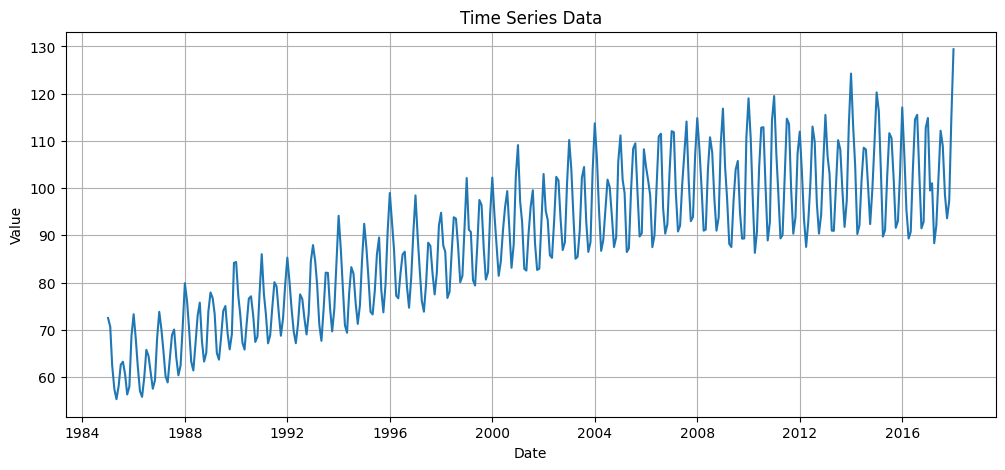

In [6]:
# Ensure the date column is in datetime format
df.iloc[:, 0] = pd.to_datetime(df.iloc[:, 0])
df.set_index(df.columns[0], inplace=True)

# Plot the time series
plt.figure(figsize=(12, 5))
plt.plot(df)
plt.title("Time Series Data")
plt.xlabel("Date")
plt.ylabel("Value")
plt.grid()
plt.show()

In [8]:
# Perform Augmented Dickey-Fuller Test
def adf_test(series):
    result = adfuller(series.dropna())  # Drop NaN values if any
    labels = ['ADF Statistic', 'p-value', '# Lags Used', 'Number of Observations Used']
    for label, value in zip(labels, result[:4]):
        print(f"{label}: {value}")

    if result[1] <= 0.05:
        print("The time series is stationary (reject H0).")
    else:
        print("The time series is non-stationary (fail to reject H0).")

In [9]:
adf_test(df.iloc[:, 0])

ADF Statistic: -2.256990350047235
p-value: 0.1862146911658712
# Lags Used: 15
Number of Observations Used: 381
The time series is non-stationary (fail to reject H0).
